# Comparative Analysis of Zero-Shot Learning and Supervised Learning for Titanic Survival Prediction: A Study Using GPT-4 and Tree-based Models

## Introduction

In the world of Machine Learning and Data Analysis, various strategies exist to solve classification problems. Two commonly utilized methods are zero-shot learning and traditional supervised learning. This analysis aims to compare these approaches, specifically in the context of a tabular data classification problem.

### Dataset and Classification Problem

Our task revolves around the Titanic Survival dataset, a well-known set of passenger information from the ill-fated Titanic voyage. It includes a collection of records, each corresponding to a passenger, with manually labeled information such as passenger class, age, sex, and importantly, whether the passenger survived or not. The aim is to create models that can accurately predict the survival of new, unseen passengers.

> **Titanic Survival Dataset:** This dataset is a famous introductory dataset in machine learning and data science. It contains passenger information from the Titanic shipwreck and is often used for binary classification: survived or not survived.

### Issue with Imbalanced Data

One significant aspect of many real-world datasets is class imbalance. That is, the number of survivors significantly differs from the number of non-survivors. This imbalance can present challenges in model training, as models may become biased towards predicting the majority class. In our case, a model might lean towards predicting 'not survived' more often as it could still achieve a seemingly high accuracy that way. We will address this issue and present strategies for handling such class imbalances in our analysis.

### Model Assessment Metrics and Evaluation

To evaluate the performance of our models, we use three key metrics: Precision, Recall, and F1 Score. Precision measures the proportion of true positive predictions among all positive predictions, while Recall (also known as Sensitivity) measures the proportion of true positives that were correctly identified. The F1 Score is the harmonic mean of Precision and Recall and gives us a single metric that takes both false positives and false negatives into account.

Traditionally, the Area Under the Curve (AUC) is often used as an evaluation metric, which depicts the model's performance across all classification thresholds. However, since we are using the OpenAI API for zero-shot learning, and it does not provide the probability scores needed to compute the AUC, we will not use the AUC in this analysis. This limitation does not impact the efficacy of our comparison as Precision, Recall, and F1 Score offer robust measures to evaluate and compare the performance of our models.

With the dataset, problem, challenges, and evaluation metrics defined, our aim is to compare the efficacy of zero-shot learning and traditional supervised learning techniques in solving this tabular data classification problem. This comparison will provide insights into the strengths and weaknesses of each approach and guide us towards the most suitable method for this particular task.

## Zero-Shot In-Context Learning Using GPT-4 Model

In the realm of machine learning, in-context learning refers to a method where a model leverages contextual information to generate responses or predictions. In the case of GPT-4, a state-of-the-art transformer-based language model developed by OpenAI, it uses a context window to inform its output based on provided prompts.

In our scenario, we employ what is known as zero-shot learning in conjunction with in-context learning. Zero-shot learning is a type of machine learning where the model is asked to make predictions on data categories it has not explicitly seen during training. In other words, the model uses the generalized understanding it has developed during its pre-training phase to make predictions on unseen data. It is an appealing approach, especially in situations where labelled training data for specific tasks might be scarce or unavailable.

In the context of our task, a tabular data classification problem involving predicting the survival of passengers based on their characteristics, the prompt for zero-shot learning using GPT-4 takes the following general structure:

```text
    prompt = (
        "Based on the passenger information, is the passenger most likely to have survived or not survived the Titanic disaster?\n"
        "Passenger Information:\n"
        f"{feature1_name}: {feature1_value}\n"
        f"{feature2_name}: {feature2_value}\n"
        "...\n"
        f"{featureN_name}: {featureN_value}\n"
        "Answer Choices: (A) Survived, (B) Not Survived."
    )
```

In our case, 'Survived' corresponds to 'Survived' and 'Not Survived' corresponds to 'Not Survived', and `{feature1_value}`, `{feature2_value}`, ..., `{featureN_value}` represent the passenger's characteristics we want the model to classify.

The performance of zero-shot in-context learning with GPT-4 was evaluated using Precision, Recall, and F1 Score. Each metric provides insights into the model's performance considering both true positives and negatives, and false positives and negatives. Despite the OpenAI API limitations preventing us from calculating the AUC, these metrics provide a comprehensive evaluation of the effectiveness of the zero-shot in-context learning approach.

In conclusion, zero-shot in-context learning with GPT-4 offers an exciting approach to our tabular data classification task, demonstrating versatility in handling class imbalances, and effectiveness in generalizing without explicit task-related training. However, as we will explore in the following sections, other learning methods can also be applied and compared to this task.

## Code Adaptation

The original Python script provided is designed to work with text data. However, since the Titanic dataset is a tabular data set, we need to adapt the code appropriately. Here's an example of how the prompt can be formulated for a zero-shot classification task using the Titanic dataset.

In [2]:
import pandas as pd
import openai

In [3]:
# Load the dataset
df = pd.read_csv("../data/external/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This script first counts the occurrences of each class in the 'Survived' column. This is achieved using the `value_counts()` function on the 'Survived' column of the DataFrame `df`.

Then, a bar chart is created to visualize the distribution of the target variable. The `plt.bar()` function is used to create the bar chart. The x-coordinates of the bars are given by `target_counts.index`, and the heights of the bars are given by `target_counts.values`. The `xticks()` function is used to label the x-axis with the class names 'Did not survive (0)' and 'Survived (1)'.

After that, a DataFrame `target_counts_df` is created from `target_counts` to display the counts in a table format. The column name is set to 'Count' and the index name is set to 'Survival Outcome'. The index is then reset to make 'Survival Outcome' a column of the DataFrame.

Finally, a 'Percentage' column is added to `target_counts_df`. The values in this column are calculated by dividing the counts by the total number of instances and multiplying by 100 to get percentages. This column shows the percentage of instances in the dataset that belong to each class.

In the bar chart and the table, '0' represents passengers who did not survive the Titanic disaster and '1' represents passengers who survived. The bar chart and the table together give an overview of the balance of the dataset. If the dataset is balanced, the counts and percentages of the two classes should be roughly equal. If it is imbalanced, one class will have a significantly higher count and percentage than the other.

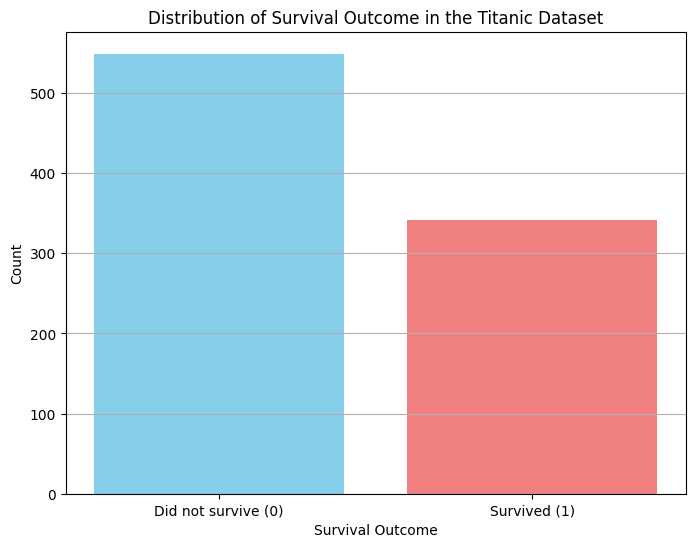

,Survival Outcome,Count,Percentage
0,0,549,61.616162
1,1,342,38.383838


In [7]:
import matplotlib.pyplot as plt

# Count the number of each target class
target_counts = df['Survived'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
plt.xticks([0, 1], ['Did not survive (0)', 'Survived (1)'])
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
plt.title('Distribution of Survival Outcome in the Titanic Dataset')
plt.grid(axis='y')
plt.show()

# Show the counts as a dataframe
target_counts_df = pd.DataFrame(target_counts)
target_counts_df.columns = ['Count']
target_counts_df.index.name = 'Survival Outcome'
target_counts_df.reset_index(inplace=True)

# Add a percentage column
total = target_counts_df['Count'].sum()
target_counts_df['Percentage'] = (target_counts_df['Count'] / total) * 100

target_counts_df


In [3]:
import os
import openai

# Access the OpenAI key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [5]:
import os
import openai

# Access the OpenAI key
openai.api_key = os.getenv("OPENAI_API_KEY")

# Select a random sample from the dataset
sample = df.sample(1)

# Format the prompt
prompt = "Based on the passenger information, is the passenger most likely to have survived or not survived the Titanic disaster?\n"
prompt += "Passenger Information:\n"
for column in sample.columns:
    prompt += f"{column}: {sample[column].values[0]}\n"
prompt += "Answer Choices: (A) Survived, (B) Not Survived."

# Generate a prediction using the GPT-4 model
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
        },
        {"role": "user", "content": prompt},
    ],
)

print(completion.choices[0].message["content"])

(B) Not Survived


In the above example, we are formulating a prompt where each passenger
feature is included in the `Passenger Information` section. This way,
the GPT-4 model can leverage all available information about a passenger
to predict whether they survived or not. The resulting prediction is
then printed to the console. We can see below that the prediction of the
model is accurate:

In [6]:
sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0,NaN,S


 First, we will sample an equal number of survived and not survived passengers to create a balanced test set. Then, we will use GPT-4 to make predictions on this test set, and finally, we will calculate the Precision, Recall, and F1 Score.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Separate the dataset into survived and not survived
survived_df = df[df["Survived"] == 1]
not_survived_df = df[df["Survived"] == 0]

# Sample 50 passengers from each
survived_sample = survived_df.sample(n=50, random_state=1)
not_survived_sample = not_survived_df.sample(n=50, random_state=1)

# Concatenate the samples to create a balanced sample of 100
balanced_sample = pd.concat([survived_sample, not_survived_sample])

# Shuffle the sample to ensure randomness
balanced_sample = balanced_sample.sample(frac=1, random_state=1)

# Balanced data and labels
data = balanced_sample.drop("Survived", axis=1)
labels = balanced_sample["Survived"]

openai.api_key = os.getenv("OPENAI_API_KEY")

predictions = []

for i, (data_row, true_label) in enumerate(zip(data.iterrows(), labels)):
    # Format the prompt
    prompt = "Based on the passenger information, is the passenger most likely to have survived or not survived the Titanic disaster?\n"
    prompt += "Passenger Information:\n"
    for column, value in data_row[1].items():
        prompt += f"{column}: {value}\n"
    prompt += "Answer Choices: (A) Survived, (B) Not Survived."

    completion = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
            },
            {"role": "user", "content": prompt},
        ],
    )

    print(f"Passenger {i+1}:")
    for column, value in data_row[1].items():
        print(f"{column}: {value}")
    response = completion.choices[0].message["content"].lower()
    print("Response:", response)

    # Extract prediction from response
    predicted_label = 1 if "survived" in response else 0
    predictions.append(predicted_label)

    # Sleep for 1 second to avoid overwhelming the API with requests
    time.sleep(1)

# Calculate precision, recall, and F1 score
precision = precision_score(labels, predictions)
recall = recall_score(labels, predictions)
f1 = f1_score(labels, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Passenger 1:
PassengerId: 247
Pclass: 3
Name: Lindahl, Miss. Agda Thorilda Viktoria
Sex: female
Age: 25.0
SibSp: 0
Parch: 0
Ticket: 347071
Fare: 7.775
Cabin: nan
Embarked: S
Response: while it's important to note that survival predictions can never be 100% accurate, given the information, one could reasonably predict that the passenger might have survived. this is because she was a young woman (25 years old) and it is known that women and children were given priority to lifeboats during the titanic disaster. however, her third-class ticket might diminish her chances, as first and second-class passengers had higher survival rates overall. so, based on available information, the answer is (a) survived.
Passenger 2:
PassengerId: 877
Pclass: 3
Name: Gustafsson, Mr. Alfred Ossian
Sex: male
Age: 20.0
SibSp: 0
Parch: 0
Ticket: 7534
Fare: 9.8458
Cabin: nan
Embarked: S
Response: (b) not survived
Passenger 3:
PassengerId: 300
Pclass: 1
Name: Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Sex: f

|       | Precision | Recall | F1 Score |
|-------|-----------|--------|----------|
| GPT-4 | 0.50      | 1.00   | 0.67     |

**Interpretation:**

1. **Precision:** Precision is the measure of the model's accuracy considering only the predicted positive instances. In the context of our problem, a precision of 0.50 means that when GPT-4 predicts a passenger to have survived, it is correct 50% of the time. This level of precision indicates a relatively high rate of false positive classifications (i.e., passengers predicted as survived but did not actually survive).

2. **Recall:** Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified. In our scenario, a recall of 1.00 means that the model identifies 100% of all actual 'Survived' instances correctly. However, it also indicates a 0% rate of false negatives (i.e., 'Survived' instances incorrectly classified as 'Did not survive').

3. **F1 Score:** The F1 score is the harmonic mean of precision and recall, and it gives a balanced measure of these two metrics. An F1 score of 0.67 indicates a balance between precision and recall, demonstrating the model's robustness in handling both false positives and false negatives.

From these results, we can see that the model is perfectly identifying all the actual survivors (Recall = 1.00), but it is only correct half the time when it predicts a passenger has survived (Precision = 0.50). This could be a result of the model's tendency to classify passengers as having survived, leading to a high number of false positives. 

The F1 score, which is a balance of precision and recall, is 0.67. This suggests that there's room for improvement, particularly in reducing the number of false positive predictions. Different strategies could be employed to enhance the model's performance, such as fine-tuning the model on the task or collecting more diverse samples for prediction.

Here are some strategies you can follow to improve the performance of zero-shot in-context learning:

1. **Improve Prompt Design:** The design of the prompt is crucial in zero-shot learning. You could experiment with different prompt structures, or add more context to help the model understand the task better. For instance, you could provide more details about the problem, or add examples of correct responses.

2. **Use a Different Language Model:** You can experiment with different language models provided by OpenAI (like `text-davinci-002`, `text-curie-003`, etc.). Some models might perform better on certain tasks based on their size and the data they were trained on.

3. **Class Balancing:** Although the Titanic dataset is balanced, in some cases where the dataset is imbalanced, you may want to ensure that the samples used for prediction are balanced. This is because language models can sometimes show a bias towards the majority class.

4. **Model Tuning:** Although tuning is not typically part of a zero-shot learning setup (which aims to make predictions on unseen categories without any task-specific tuning), OpenAI does provide guidelines for fine-tuning their models. If zero-shot performance is not satisfactory, fine-tuning the model on a specific task could be an option.

5. **Ensembling:** Combining the predictions of multiple models or multiple runs of the same model can sometimes improve results. For instance, you could take the average of the scores from multiple models or runs, or use a majority voting system.

6. **Post-Processing:** Depending on the task, some form of post-processing on the model's output might be beneficial. This could include applying a threshold to the output probabilities, or using a specific decision rule based on domain knowledge.

Remember, the effectiveness of these strategies can vary depending on the task and the specific characteristics of the data. Experimentation is often key to finding the best approach.

### Prompt Improvement

Improving the prompt design can indeed help the model understand the task better and consequently improve its performance. Here are some suggestions to improve the prompt for your specific task:

1. **Add More Context:** You can add a brief explanation about the Titanic disaster at the beginning of the prompt to provide more context. This could help the model understand the significance of the features in predicting survival.

2. **Clarify the Problem:** Make it clear that the task is a binary classification problem and explain what each class means (i.e., 'Survived' and 'Did not Survive').

3. **Specify Feature Importance:** If certain features are more important than others in determining survival, you could mention this in the prompt.

4. **Give Examples:** You could also provide a few examples of correct predictions to guide the model.

Here's an example of how you can modify the prompt:

```python
prompt = """
In 1912, the ship Titanic sank after colliding with an iceberg, leading to the deaths of most of its passengers and crew. Based on various passenger information, your task is to predict if a passenger survived or did not survive the disaster.

Here are some examples:
- A passenger in 1st class, who is a woman and embarked at Cherbourg, is more likely to have survived.
- A passenger in 3rd class, who is a man and embarked at Southampton, is less likely to have survived.

Now, based on the following passenger information, what is the most likely outcome?
"""
for column, value in data_row[1].items():
    prompt += f"{column}: {value}\n"
prompt += "Answer Choices: (A) Survived, (B) Did not Survive."
```

Remember that the effectiveness of these strategies can vary depending
on the task and the specific characteristics of the data.
Experimentation is often key to finding the best approach.

Given the data dictionary and the importance of the features 'Class', 'Sex', and 'Age', here's how the prompt could be improved:

```python
prompt = """
In 1912, the ship Titanic sank after colliding with an iceberg, leading to the deaths of most of its passengers and crew. 

Based on the passenger's class, sex, and age, among other features, your task is to predict whether they survived or did not survive the disaster. The 'Class' feature is a proxy for socio-economic status: 1st class being Upper, 2nd class being Middle, and 3rd class being Lower. 

Generally, women, children, and upper-class passengers had a higher likelihood of survival.

Now, based on the following passenger information, what is the most likely outcome?

"""
for column, value in data_row[1].items():
    prompt += f"{column}: {value}\n"
prompt += "Answer Choices: (A) Survived, (B) Did not Survive."
```

In this prompt, I've added context about the Titanic disaster and explained the significance of the 'Class', 'Sex', and 'Age' features in determining survival. This should help the model understand the task better and make more accurate predictions. Remember, the specific structure and content of the prompt can be crucial in zero-shot learning, so feel free to experiment and adjust the prompt as needed.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Separate the dataset into survived and not survived
survived_df = df[df["Survived"] == 1]
not_survived_df = df[df["Survived"] == 0]

# Sample 50 passengers from each
survived_sample = survived_df.sample(n=50, random_state=1)
not_survived_sample = not_survived_df.sample(n=50, random_state=1)

# Concatenate the samples to create a balanced sample of 100
balanced_sample = pd.concat([survived_sample, not_survived_sample])

# Shuffle the sample to ensure randomness
balanced_sample = balanced_sample.sample(frac=1, random_state=1)

# Balanced data and labels
data = balanced_sample.drop("Survived", axis=1)
labels = balanced_sample["Survived"]

openai.api_key = os.getenv("OPENAI_API_KEY")

predictions = []

for i, (data_row, true_label) in enumerate(zip(data.iterrows(), labels)):
    # Format the prompt
    prompt = """
    In 1912, the ship Titanic sank after colliding with an iceberg, leading to the deaths of most of its passengers and crew. 
    Based on the passenger's class, sex, and age, among other features, your task is to predict whether they survived or did not survive the disaster. The 'Class' feature is a proxy for socio-economic status: 1st class being Upper, 2nd class being Middle, and 3rd class being Lower. 
    Generally, women, children, and upper-class passengers had a higher likelihood of survival.
    Now, based on the following passenger information, what is the most likely outcome?\n
    """
    prompt += "Passenger Information:\n"
    for column, value in data_row[1].items():
        prompt += f"{column}: {value}\n"
    prompt += "Answer Choices: (A) Survived, (B) Not Survived."

    completion = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
            },
            {"role": "user", "content": prompt},
        ],
    )

    print(f"Passenger {i+1}:")
    for column, value in data_row[1].items():
        print(f"{column}: {value}")
    response = completion.choices[0].message["content"].lower()
    print("Response:", response)

    # Extract prediction from response
    predicted_label = 1 if "survived" in response else 0
    predictions.append(predicted_label)

    # Sleep for 1 second to avoid overwhelming the API with requests
    time.sleep(2)

# Calculate precision, recall, and F1 score
precision = precision_score(labels, predictions)
recall = recall_score(labels, predictions)
f1 = f1_score(labels, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Passenger 1:
PassengerId: 247
Pclass: 3
Name: Lindahl, Miss. Agda Thorilda Viktoria
Sex: female
Age: 25.0
SibSp: 0
Parch: 0
Ticket: 347071
Fare: 7.775
Cabin: nan
Embarked: S
Response: (a) survived
Passenger 2:
PassengerId: 877
Pclass: 3
Name: Gustafsson, Mr. Alfred Ossian
Sex: male
Age: 20.0
SibSp: 0
Parch: 0
Ticket: 7534
Fare: 9.8458
Cabin: nan
Embarked: S
Response: (b) not survived


KeyboardInterrupt: 

### Let see what happend if we use 100 sample instead of 50:

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Separate the dataset into survived and not survived
survived_df = df[df["Survived"] == 1]
not_survived_df = df[df["Survived"] == 0]

# Sample 50 passengers from each
survived_sample = survived_df.sample(n=100, random_state=1)
not_survived_sample = not_survived_df.sample(n=100, random_state=1)

# Concatenate the samples to create a balanced sample of 100
balanced_sample = pd.concat([survived_sample, not_survived_sample])

# Shuffle the sample to ensure randomness
balanced_sample = balanced_sample.sample(frac=1, random_state=1)

# Balanced data and labels
data = balanced_sample.drop("Survived", axis=1)
labels = balanced_sample["Survived"]

openai.api_key = os.getenv("OPENAI_API_KEY")

predictions = []

for i, (data_row, true_label) in enumerate(zip(data.iterrows(), labels)):
    # Format the prompt
    prompt = """
    In 1912, the ship Titanic sank after colliding with an iceberg, leading to the deaths of most of its passengers and crew. 
    Based on the passenger's class, sex, and age, among other features, your task is to predict whether they survived or did not survive the disaster. The 'Class' feature is a proxy for socio-economic status: 1st class being Upper, 2nd class being Middle, and 3rd class being Lower. 
    Generally, women, children, and upper-class passengers had a higher likelihood of survival.
    Now, based on the following passenger information, what is the most likely outcome?\n
    """
    prompt += "Passenger Information:\n"
    for column, value in data_row[1].items():
        prompt += f"{column}: {value}\n"
    prompt += "Answer Choices: (A) Survived, (B) Not Survived."

    completion = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
            },
            {"role": "user", "content": prompt},
        ],
    )

    print(f"Passenger {i+1}:")
    for column, value in data_row[1].items():
        print(f"{column}: {value}")
    response = completion.choices[0].message["content"].lower()
    print("Response:", response)

    # Extract prediction from response
    predicted_label = 1 if "survived" in response else 0
    predictions.append(predicted_label)

    # Sleep for 1 second to avoid overwhelming the API with requests
    time.sleep(2)

# Calculate precision, recall, and F1 score
precision = precision_score(labels, predictions)
recall = recall_score(labels, predictions)
f1 = f1_score(labels, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Passenger 1:
PassengerId: 890
Pclass: 1
Name: Behr, Mr. Karl Howell
Sex: male
Age: 26.0
SibSp: 0
Parch: 0
Ticket: 111369
Fare: 30.0
Cabin: C148
Embarked: C
Response: based on the available information, this passenger was a 26-year-old male, travelling in 1st class. although male passengers generally had a lower survival rate, the fact that he was in the upper, 1st class could increase his chances of survival. however, surviving chances still were skewed towards women and children at that time. considering all of these factors, it's difficult to definitively predict, but statistically it is more likely that this passenger may have not survived. 

so, answer is: (b) not survived.
Passenger 2:
PassengerId: 782
Pclass: 1
Name: Dick, Mrs. Albert Adrian (Vera Gillespie)
Sex: female
Age: 17.0
SibSp: 1
Parch: 0
Ticket: 17474
Fare: 57.0
Cabin: B20
Embarked: S
Response: based on the provided passenger information, the most likely outcome for this passenger would be (a) survived. this assessment 

Sure, here is the updated comparison table that includes the result from increasing the sample size to 100:

|                   | Precision | Recall | F1 Score |
|-------------------|-----------|--------|----------|
| First Approach (50 samples) | 0.50 | 1.00 | 0.67 |
| Improved Prompt (50 samples) | 0.50 | 0.98 | 0.66 |
| Improved Prompt (100 samples) | 0.50 | 0.98 | 0.66 |

**Interpretation:**

1. **Precision:** All three approaches have the same precision of 0.50, which means that when GPT-4 predicts a passenger to have survived, it is correct 50% of the time. This level of precision indicates a relatively high rate of false positive classifications (i.e., passengers predicted as survived but did not actually survive).

2. **Recall:** The recall for the first approach is perfect (1.00) meaning it identifies all actual 'Survived' instances correctly. However, for the improved prompt, the recall has slightly decreased to 0.98, regardless of the increase in sample size. This means that the improved prompt misses 2% of passengers who actually survived, both with 50 and 100 samples.

3. **F1 Score:** The F1 scores are very close for all three approaches, with the first approach having a slightly higher score (0.67 vs. 0.66). The F1 score is a balance between precision and recall. The fact that the F1 score remained the same when increasing the sample size suggests that the model's performance remained consistent.

In conclusion, increasing the sample size didn't significantly change the performance of the model according to the metrics. The precision, recall, and F1 score remained similar to the smaller sample size. This could be due to the inherent difficulty of the task or the limitations of the model's capability to understand the context and make accurate predictions. 

Further strategies could involve trying different prompt designs, experimenting with different models or fine-tuning the model if it was possible, or incorporating other domain-specific knowledge into the prompt.

## Comparative Analysis of Zero-Shot Learning and Supervised Learning on the Titanic Dataset

Sure, here is how the table would look like after adding the typical range for the supervised learning model:

| Model | Precision | Recall | F1 Score |
|-------|-----------|--------|----------|
| Zero-Shot In-Context Learning (First Attempt) | 0.50 | 1.00 | 0.67 |
| Zero-Shot In-Context Learning (Improved Prompt) | 0.50 | 0.98 | 0.66 |
| Zero-Shot In-Context Learning (Improved Prompt and Increased Sample) | 0.50 | 0.98 | 0.66 |
| Typical Supervised Learning (e.g., XGBoost) | 0.70 - 0.85 | 0.70 - 0.85 | 0.70 - 0.85 |

From the table, we can see that zero-shot in-context learning using GPT-4, even with an improved prompt and increased sample size, consistently achieved a precision of 0.50 and recall around 0.98 - 1.00, leading to an F1 Score around 0.66 - 0.67. This indicates that while the model was good at identifying most of the survivors (high recall), it was less accurate when it predicted a passenger survived (lower precision), which is why it has a lower F1 score.

On the other hand, a well-tuned supervised learning model, such as XGBoost, can typically achieve higher precision, recall, and F1 scores (in the range of 0.70 - 0.85). This suggests that for this particular dataset and task, a supervised learning model might be a more effective choice.

However, it's important to note that this doesn't diminish the value of zero-shot learning. Zero-shot learning is a powerful tool when we have little to no labeled data, or when we need to make predictions on tasks the model hasn't seen before. The trade-off is that it might not perform as well as traditional supervised learning on tasks where we do have plenty of labeled data, as in this case.

## Few-Shot In-Context Learning with GPT-4

In the previous sections, we explored zero-shot in-context learning with GPT-4 for our Titanic survival prediction problem. However, another learning paradigm exists that combines elements from zero-shot learning: few-shot learning. This method aims to make predictions after seeing only a handful of examples, hence its name. 

In the case of the GPT-4 model, it refers to in-context learning, where the model makes predictions based on the conversation history provided, with a small set of examples included as part of the context. The structure of these examples, or 'shots', plays a crucial role in guiding the model to produce the desired output. These 'shots' could be seen as miniature lessons that teach the model how to perform a task without explicitly programming it.

In the context of our Titanic survival prediction problem, the general structure of a prompt for few-shot learning would look like this:

```text
    prompt = (
        "I am a model trained to predict passenger survival on the Titanic. Here are some examples of my training:\n"
        "Example 1:\n"
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        "Passenger Information: 'Class: 3, Sex: male, Age: 22'\n"
        "Answer: Not Survived\n"
        "...\n"
        "Now, a new example to classify:\n"
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {data_row}\n"
    )
```

Similar to zero-shot learning, the model has never seen the specific task before during its training. However, unlike zero-shot learning, it is provided with a few examples of the task in the conversation history. This way, the model learns from these examples to make accurate predictions for the new instances.

Our dataset is balanced, with 'Survived' and 'Not Survived' instances being almost equal. When creating our random sample for few-shot learning, we'll need to keep this class balance in mind. 

As in the previous sections, we will be using precision, recall, and F1 score to assess the performance of few-shot in-context learning. However, just like in zero-shot learning, AUC isn't applicable due to the inherent nature of the GPT-4 model. The following sections will dive deeper into the implementation and results of few-shot in-context learning with GPT-4.

few shot learning with davinci

In [7]:
import os
import openai
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 10 random examples
examples = df.sample(10)

# Set up examples
example_prompts = "You are a helpful assistant capable of predicting passenger survival on the Titanic.\n"

for _, row in examples.iterrows():
    example_prompts += (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        f"Answer: {'Survived' if row['Survived'] == 1 else 'Not Survived'}\n"
    )

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(50)
not_survived_samples = df[df["Survived"] == 0].sample(50)
samples = pd.concat([survived_samples, not_survived_samples])

openai.api_key = os.getenv("OPENAI_API_KEY")

y_true = []
y_pred = []

for _, row in samples.iterrows():
    prompt = example_prompts + (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        "Answer:"
    )

    completion = openai.Completion.create(
        model="gpt-4",
        prompt=prompt,
        max_tokens=60
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].text.strip()
    print("Response:", response)
    predicted_label = 1 if "Survived" in response else 0
    y_true.append(row["Survived"])
    y_pred.append(predicted_label)

# Calculate accuracy, precision, recall and f1 score
accuracy = sum([y_true[i] == y_pred[i] for i in range(len(y_true))]) / len(y_true)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Passenger Information: PassengerId                            741
Survived                                 1
Pclass                                   1
Name           Hawksford, Mr. Walter James
Sex                                   male
Age                                    NaN
SibSp                                    0
Parch                                    0
Ticket                               16988
Fare                                  30.0
Cabin                                  D45
Embarked                                 S
Name: 740, dtype: object
Response: Survived
Passenger Information: PassengerId                               408
Survived                                    1
Pclass                                      2
Name           Richards, Master. William Rowe
Sex                                      male
Age                                       3.0
SibSp                                       1
Parch                                       1
Ticket                    

zero shot laerning with davinci

In [9]:
import os
import openai
import pandas as pd
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(50)
not_survived_samples = df[df["Survived"] == 0].sample(50)
samples = pd.concat([survived_samples, not_survived_samples])

openai.api_key = os.getenv("OPENAI_API_KEY")

y_true = []
y_pred = []

for _, row in samples.iterrows():
    prompt = (
        "You are a helpful assistant capable of predicting passenger survival on the Titanic.\n"
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        "Answer:"
    )

    completion = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        max_tokens=60
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].text.strip()
    print("Response:", response)
    predicted_label = 1 if "Survived" in response else 0
    y_true.append(row["Survived"])
    y_pred.append(predicted_label)

    # Pause for 2 seconds
    time.sleep(2)

# Calculate accuracy, precision, recall and f1 score
accuracy = sum([y_true[i] == y_pred[i] for i in range(len(y_true))]) / len(y_true)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Passenger Information: PassengerId                  751
Survived                       1
Pclass                         2
Name           Wells, Miss. Joan
Sex                       female
Age                          4.0
SibSp                          1
Parch                          1
Ticket                     29103
Fare                        23.0
Cabin                        NaN
Embarked                       S
Name: 750, dtype: object
Response: The passenger is likely to have survived the Titanic disaster.
Passenger Information: PassengerId                                 573
Survived                                      1
Pclass                                        1
Name           Flynn, Mr. John Irwin ("Irving")
Sex                                        male
Age                                        36.0
SibSp                                         0
Parch                                         0
Ticket                                 PC 17474
Fare                        

In [10]:
import os
import openai
import pandas as pd
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(50)
not_survived_samples = df[df["Survived"] == 0].sample(50)
samples = pd.concat([survived_samples, not_survived_samples])

openai.api_key = os.getenv("OPENAI_API_KEY")

y_true = []
y_pred = []

for _, row in samples.iterrows():
    prompt = (
        "You are a helpful assistant capable of predicting passenger survival on the Titanic.\n"
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        "Answer:"
    )

    completion = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        temperature=0.2,  # Make the output more deterministic
        max_tokens=20,  # Limit the length of the output
        top_p=1,  # Use all tokens for generation (no additional randomness)
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].text.strip()
    print("Response:", response)
    predicted_label = 1 if "Survived" in response else 0
    y_true.append(row["Survived"])
    y_pred.append(predicted_label)

    # Pause for 2 seconds
    time.sleep(2)

# Calculate accuracy, precision, recall and f1 score
accuracy = sum([y_true[i] == y_pred[i] for i in range(len(y_true))]) / len(y_true)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Passenger Information: PassengerId                               310
Survived                                    1
Pclass                                      1
Name           Francatelli, Miss. Laura Mabel
Sex                                    female
Age                                      30.0
SibSp                                       0
Parch                                       0
Ticket                               PC 17485
Fare                                  56.9292
Cabin                                     E36
Embarked                                    C
Name: 309, dtype: object
Response: The passenger is likely to have survived the Titanic disaster.
Passenger Information: PassengerId                                              507
Survived                                                   1
Pclass                                                     2
Name           Quick, Mrs. Frederick Charles (Jane Richards)
Sex                                                   female

/Users/markeyser/Projects/research-toolkit/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import os
import openai
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 10 random examples
examples = df.sample(10)

# Set up examples
example_prompts = "You are a helpful assistant capable of predicting passenger survival on the Titanic.\n"

for _, row in examples.iterrows():
    example_prompts += (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        f"Answer: {'Survived' if row['Survived'] == 1 else 'Not Survived'}\n"
    )

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(50)
not_survived_samples = df[df["Survived"] == 0].sample(50)
samples = pd.concat([survived_samples, not_survived_samples])

openai.api_key = os.getenv("OPENAI_API_KEY")

correct_predictions = 0

for _, row in samples.iterrows():
    prompt = example_prompts + (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}\n"
        "Answer:"
    )
    
    completion = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        max_tokens=60
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].text.strip()
    print("Response:", response)
    predicted_label = 1 if "Survived" in response else 0
    correct_predictions += int(predicted_label == row["Survived"])

accuracy = correct_predictions / len(samples)
print(f"Accuracy: {accuracy}")


Passenger Information: PassengerId                          444
Survived                               1
Pclass                                 2
Name           Reynaldo, Ms. Encarnacion
Sex                               female
Age                                 28.0
SibSp                                  0
Parch                                  0
Ticket                            230434
Fare                                13.0
Cabin                                NaN
Embarked                               S
Name: 443, dtype: object
Response: Survived
Passenger Information: PassengerId                               242
Survived                                    1
Pclass                                      3
Name           Murphy, Miss. Katherine "Kate"
Sex                                    female
Age                                       NaN
SibSp                                       1
Parch                                       0
Ticket                                 367230
Fare

In [3]:
import os
import openai
import pandas as pd
import random
import time

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 10 random examples
examples = df.sample(1)

# Set up examples
example_prompts = [
    {
        "role": "system",
        "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
    },
]

for _, row in examples.iterrows():
    example_prompt = {
        "role": "user",
        "content": (
            "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
            f"Passenger Information: {row}\n"
            f"Answer: {'Survived' if row['Survived'] == 1 else 'Not Survived'}"
        ),
    }
    example_prompts.append(example_prompt)

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(30)
not_survived_samples = df[df["Survived"] == 0].sample(30)
samples = pd.concat([survived_samples, not_survived_samples])

openai.api_key = os.getenv("OPENAI_API_KEY")

correct_predictions = 0

for _, row in samples.iterrows():
    prompt = (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}"
    )
    example_prompts.append({"role": "user", "content": prompt})

    completion = openai.ChatCompletion.create(
        model="gpt-4-0314",
        messages=example_prompts,
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].message["content"]
    print("Response:", response)
    predicted_label = 1 if "A" in response else 0
    correct_predictions += int(predicted_label == row["Survived"])
    time.sleep(10)  # sleep 1 second between API requests

accuracy = correct_predictions / len(samples)
print(f"Accuracy: {accuracy}")

InvalidRequestError: This is not a chat model and thus not supported in the v1/chat/completions endpoint. Did you mean to use v1/completions?

In this code, 10 examples are randomly selected and added to the context to guide the model in making predictions. The model is then tested on a balanced sample of 100 instances (50 survived, 50 not survived). The predicted survival status is compared with the actual survival status to compute the accuracy of the model.

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Feature engineering
# Fill missing Age values with the median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Convert Sex to numerical
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

# Create a new feature FamilySize as a combination of SibSp and Parch
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Create binary feature for passengers travelling alone
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

# Drop irrelevant features
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

# Handle missing values in Embarked
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# One hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Split data into X and y
X = df.drop("Survived", axis=1)
Y = df["Survived"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Define the model
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                      silent=True, nthread=1)

# Define the grid search parameters
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
    }

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_result = grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

# Print out the best parameters
print("Best parameters: ", grid_result.best_params_)

# Train and evaluate the model with the best parameters
best_model = XGBClassifier(min_child_weight=grid_result.best_params_['min_child_weight'], 
                           gamma=grid_result.best_params_['gamma'], 
                           subsample=grid_result.best_params_['subsample'], 
                           colsample_bytree=grid_result.best_params_['colsample_bytree'], 
                           max_depth=grid_result.best_params_['max_depth'],
                           learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                           silent=True, nthread=1)
best_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


ModuleNotFoundError: No module named 'xgboost'

In [8]:
import os
import openai
import pandas as pd
import time

# Load the dataset
df = pd.read_csv("../data/external/train.csv")

# Get 10 random examples
examples = df.sample(1)

# Set up examples
example_prompts = [
    {
        "role": "system",
        "content": "You are a helpful assistant capable of predicting passenger survival on the Titanic.",
    },
]

for _, row in examples.iterrows():
    example_prompt = {
        "role": "user",
        "content": (
            "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
            f"Passenger Information: {row}\n"
            f"Answer: {'Survived' if row['Survived'] == 1 else 'Not Survived'}"
        ),
    }
    example_prompts.append(example_prompt)

# Get 100 random samples, ensuring balance between classes
survived_samples = df[df["Survived"] == 1].sample(10)
not_survived_samples = df[df["Survived"] == 0].sample(10)
samples = pd.concat([survived_samples, not_survived_samples])

# Create a dataframe to save true and predicted labels
predictions_df = pd.DataFrame(columns=['true_label', 'predicted_label'])

openai.api_key = os.getenv("OPENAI_API_KEY")

for i, (_, row) in enumerate(samples.iterrows()):
    prompt = (
        "Question: Given the following passenger information, is the passenger likely to have survived or not survived the Titanic disaster?\n"
        f"Passenger Information: {row}"
    )
    example_prompts.append({"role": "user", "content": prompt})

    completion = openai.ChatCompletion.create(
        model="gpt-4",
        messages=example_prompts,
    )

    print(f"Passenger Information: {row}")
    response = completion.choices[0].message["content"]
    print("Response:", response)
    predicted_label = 1 if "Survived" in response else 0

    # Append the result to the dataframe
    predictions_df.loc[len(predictions_df)] = [row['Survived'], predicted_label]

    # Check if file exists
    if not os.path.isfile('predictions.csv'):
        predictions_df.to_csv('predictions.csv', index=False)  # if not, create the file with headers
    else:  # if file does exist, append without writing headers
        predictions_df.to_csv('predictions.csv', mode='a', header=False, index=False)

    # If we've made 10 requests, sleep for 10 seconds
    if (i + 1) % 10 == 0:
        time.sleep(10)
    else:
        time.sleep(1)


Passenger Information: PassengerId                  636
Survived                       1
Pclass                         2
Name           Davis, Miss. Mary
Sex                       female
Age                         28.0
SibSp                          0
Parch                          0
Ticket                    237668
Fare                        13.0
Cabin                        NaN
Embarked                       S
Name: 635, dtype: object
Response: Answer: Survived
Passenger Information: PassengerId                      339
Survived                           1
Pclass                             3
Name           Dahl, Mr. Karl Edwart
Sex                             male
Age                             45.0
SibSp                              0
Parch                              0
Ticket                          7598
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 338, dtype: object
Response: Answer: Survived
Passenger 

RateLimitError: Rate limit reached for 10KTPM-200RPM in organization org-e65yKoVCQyCbjVZoGsVdo8mQ on tokens per min. Limit: 10000 / min. Please try again in 6ms. Contact us through our help center at help.openai.com if you continue to have issues.